<h1><strong>Question 1<strong></h1>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\leboh\Downloads\lawyers")

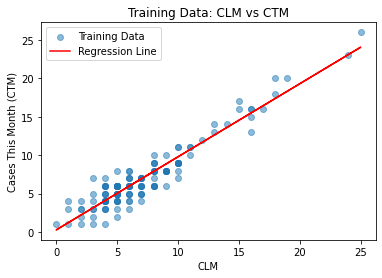

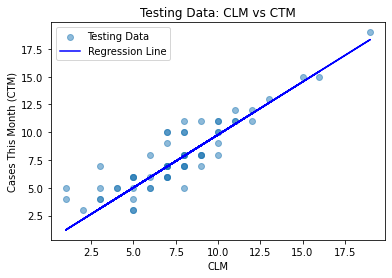

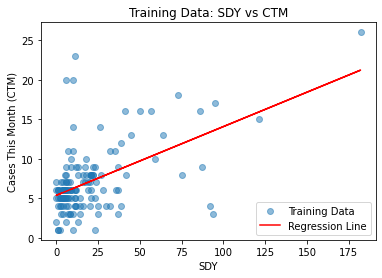

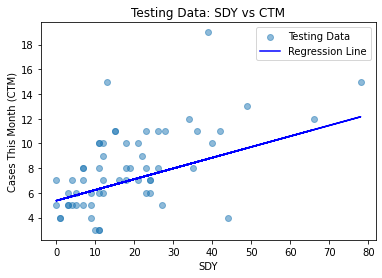

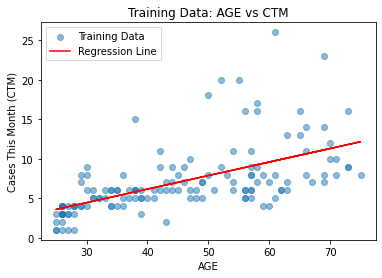

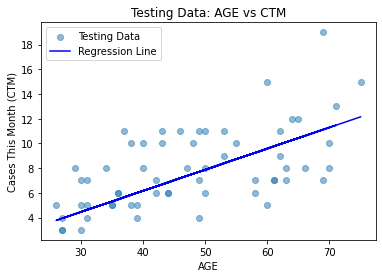

Predictor: CLM
Training R-squared: 0.9000889512935107
Coefficient: 0.9511538547461071
Intercept: 0.264582355963632

Predictor: CLM
Testing R-squared: 0.774206782506077

Predictor: SDY
Training R-squared: 0.27867484086547234
Coefficient: 0.0870474349839579
Intercept: 5.364662142602889

Predictor: SDY
Testing R-squared: 0.23888786821378483

Predictor: AGE
Training R-squared: 0.3408110199982268
Coefficient: 0.17102320360209483
Intercept: -0.6762959691979308

Predictor: AGE
Testing R-squared: 0.3109536325590123



In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv(r"C:\Users\leboh\Downloads\lawyers")

# Define predictor and response variables
predictors = ["CLM", "SDY", "AGE"]
target = "CTM"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.3, random_state=42)

# Iterate over predictors
for predictor in predictors:
    # Training data
    X_train_predictor = sm.add_constant(X_train[predictor])  # Adding a constant term to the predictor
    model_train = sm.OLS(y_train, X_train_predictor).fit()  # Fit the model
    predictions_train = model_train.predict(X_train_predictor)
    
    # Testing data
    X_test_predictor = sm.add_constant(X_test[predictor])  # Adding a constant term to the predictor
    predictions_test = model_train.predict(X_test_predictor)
    
    # Plot training data
    plt.scatter(X_train[predictor], y_train, alpha=0.5, label='Training Data')
    plt.plot(X_train[predictor], predictions_train, color='red', label='Regression Line')
    plt.title(f'Training Data: {predictor} vs CTM')
    plt.xlabel(predictor)
    plt.ylabel('Cases This Month (CTM)')
    plt.legend()
    plt.show()
    
    # Plot testing data
    plt.scatter(X_test[predictor], y_test, alpha=0.5, label='Testing Data')
    plt.plot(X_test[predictor], predictions_test, color='blue', label='Regression Line')
    plt.title(f'Testing Data: {predictor} vs CTM')
    plt.xlabel(predictor)
    plt.ylabel('Cases This Month (CTM)')
    plt.legend()
    plt.show()

    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.3, random_state=42)

# Iterate over predictors
for predictor in predictors:
    # Training data
    X_train_predictor = sm.add_constant(X_train[predictor])  # Adding a constant term to the predictor
    model_train = sm.OLS(y_train, X_train_predictor).fit()  # Fit the model
    predictions_train = model_train.predict(X_train_predictor)
    
    # Testing data
    X_test_predictor = sm.add_constant(X_test[predictor])  # Adding a constant term to the predictor
    predictions_test = model_train.predict(X_test_predictor)
    
    # Output regression results
    print(f"Predictor: {predictor}")
    print(f"Training R-squared: {model_train.rsquared}")
    print(f"Coefficient: {model_train.params[predictor]}")
    print(f"Intercept: {model_train.params['const']}")
    print()
    
    print(f"Predictor: {predictor}")
    print(f"Testing R-squared: {1 - np.sum((y_test - predictions_test)**2) / np.sum((y_test - np.mean(y_test))**2)}")
    print()

The three scatter plots above show the variables CLM, SDY, and AGE, each plotted against CTM. The data split is 70% training and 30% testing. The training and testing R-squared values of each variable are below the plots.

<strong>CLM<strong>

The best fit line fits the training data excellently because it passes through a lot of the datapoints and captures the trend. The corresponding value of the coefficient of determination is 0.9000889512935107 which implies that about 90% of the variation in the CTM is predictable from the CLM. 

The best fit line passing through the testing data has a lower r-squared value of 0.774206782506077. This time, about 77% of the variation in the CTM is predictable from the CLM. These are the two highest values of all coefficients of determination.
    
<strong>SDY<strong>

In the scatter plot for the training data, the best fit line has a poor fit. A lot of the datapoints lie between the 0 to 50 interval and the data does not show a relationship. The best fit line passes through a lot of the datapoints - without following a particular trend - in that region and passes through much less beyond it. This makes the line seem arbitrary. The r-squared value is 0.27867484086547234. This means that about 27% of the variation in the CTM is predictable from the SDY. 

The testing data is more spread out and the fit of the line is a lot poorer. There are also a lot more outliers. The r-squared value is 0.23888786821378483, implying that about 23% of the variation in the CTM is predictable from the SDY.

<strong>AGE<strong>

The scatter plot for the testing data indicates that the best fit line has a poor fit because the data points are widely scattered around the line and there are a lot of outliers. This is however, a better fit than the best fit line in the scatter plot of the testing data. The line does not capture the trend and the datapoints are spread more widely around the line.
 
This corresponds to the low r-squared values of each dataset. The training dataset has an r-squared value of 0.3408110199982268, that tells us that about 34% of the variation in the CTM is predictable by the AGE. The testing dataset has an r-squared value of 0.3109536325590123. This time, about 31% of the variation in the CTM is predictable by AGE. These values tell us that the line does not describe much of the variance.

Training R-squared: 0.5080202336808441
Testing R-squared: 0.26822655383816074


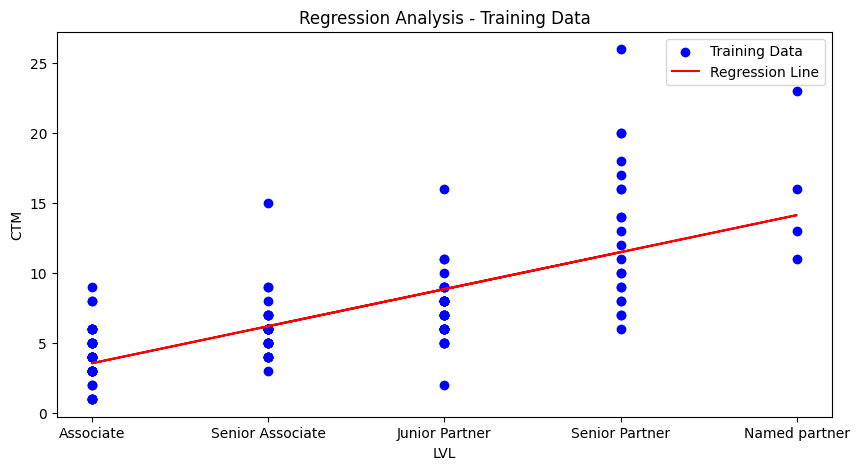

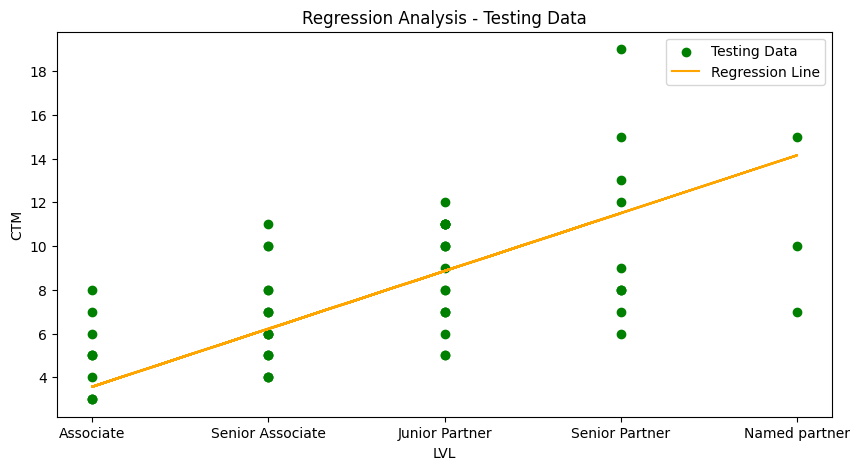

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv("C:/Users/Duma/Downloads/lawyers.csv")

data['LVL'] = data['LVL'].map({
    'Associate': 1,
    'Senior Associate': 2,
    'Junior Partner': 3,
    'Senior Partner': 4,
    'Managing Partner': 5
})

X = data[['LVL']]  
y = data['CTM']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

# Step 7: Plot scatter plots with regression line for training data
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, train_pred, color='red', label='Regression Line')
plt.xticks([1, 2, 3, 4, 5], ['Associate', 'Senior Associate', 'Junior Partner', 'Senior Partner', 'Named partner'])
plt.xlabel('LVL')
plt.ylabel('CTM')
plt.title('Regression Analysis - Training Data')
plt.legend()
plt.show()

# Step 8: Plot scatter plots with regression line for testing data
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, test_pred, color='orange', label='Regression Line')
plt.xticks([1, 2, 3, 4, 5], ['Associate', 'Senior Associate', 'Junior Partner', 'Senior Partner', 'Named partner'])
plt.xlabel('LVL')
plt.ylabel('CTM')
plt.title('Regression Analysis - Testing Data')
plt.legend()
plt.show()


<strong>LVL<strong>

The scatter plot above depicts the variable, LVL, plotted against CTM. The data was split the same way the others were (70% training, 30% testing). 

The r-squared value of the training data is 0.5080202336808441 which implies that the line of best fit has a moderate fit. For the testing data, the r-squared value is 0.26822655383816074 and this tells us that the fit is very poor because it is low.